In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./src/network.csv')

## Neural network for classification

In [3]:
df.head()

,LNCEL name,PERIOD_START_TIME,"E-RAB Stp Att, QCI2","E-RAB Stp Att, QCI3","E-RAB Stp Att, QCI4",Add E-RAB Stp Att,"E-RAB Stp Att, QCI1",Avg act UEs DL DRBs QCI1,Avg act UEs UL DRBs QCI1,Max Act UEs per cell DL,...,Max nr active UEs per cell,Max nr RRC conn UEs per cell,Avg Nr UEs UL intra-eNB CoMP,Avg CA capab UEs DL,Avg CA cap UEs for 3CCs DL,Avg UEs active SCell DL,Avg UEs activ 2 SCell DL,Avg Latency Uplink,Amount of active cells,target
0,WO09sL6,06.21.2019 22:00:00,0,0,0,0,0,0.00,0.0,2,...,7,7,0.0,1.11,0.92,0.0,0.0,0.0,1,0
1,WO09sL6,06.22.2019 01:00:00,0,0,0,0,0,0.11,0.0,2,...,5,5,0.0,0.68,0.39,0.0,0.0,0.0,1,0
2,WO09sL6,06.22.2019 02:00:00,0,0,0,0,0,0.00,0.0,2,...,5,5,0.0,0.52,0.36,0.0,0.0,0.0,1,0
3,WO09sL6,06.22.2019 03:00:00,0,0,0,0,0,0.00,0.0,2,...,5,5,0.0,0.54,0.46,0.0,0.0,0.0,1,0
4,WO09sL6,06.22.2019 04:00:00,0,0,0,0,0,0.00,0.0,2,...,4,4,0.0,0.44,0.35,0.0,0.0,0.0,1,0


In [4]:
X=df.iloc[:,4:-1] #exclude last column + zeros columns + name/timestamp

In [5]:
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.8)

In [7]:
from sklearn.neural_network import MLPClassifier # MLP = Multi-Layer-Perceptron

In [8]:
nn = MLPClassifier(hidden_layer_sizes=(3,3), random_state=123)

In [9]:
nn.fit(X_train, y_train)

C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=123, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Learning curve

In [10]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(nn, X_train, y_train)

C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

In [11]:
train_sizes

array([ 75, 246, 417, 588, 759])

In [12]:
train_scores

array([[1.        , 0.61333333, 0.61333333],
       [0.91463415, 0.8495935 , 0.8495935 ],
       [0.88489209, 0.86091127, 0.8705036 ],
       [0.8622449 , 0.85884354, 0.87244898],
       [0.85111989, 0.84848485, 0.85111989]])

In [13]:
test_scores

array([[0.84776903, 0.42631579, 0.48812665],
       [0.84776903, 0.84736842, 0.84960422],
       [0.84776903, 0.84736842, 0.84960422],
       [0.84776903, 0.85      , 0.84960422],
       [0.84776903, 0.85      , 0.85224274]])

In [14]:
import numpy as np

In [15]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

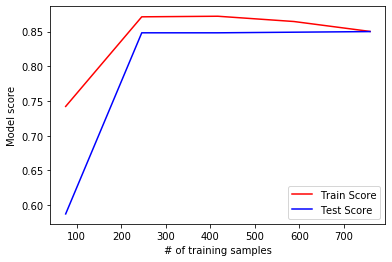

In [16]:
plt.plot(train_sizes, train_scores_mean, label='Train Score', color='r')
plt.plot(train_sizes, test_scores_mean, label='Test Score', color='b')
plt.xlabel('# of training samples')
plt.ylabel('Model score')
plt.legend(loc='best')

In [17]:
X.shape

(1426, 16)

Works the same way as other algorithms in `sklearn`.

## Autoencoders

In [53]:
df = pd.read_csv('./src/network_all_cells.zip')

In [54]:
df.dropna(axis=0, inplace=True)

In [55]:
df.columns

Index(['PERIOD_START_TIME', 'LNCEL name', 'RACH Stp Completion SR',
       'Avg CA cap UEs for 3CCs DL', 'Max nr active UEs per cell'],
      dtype='object')

In [56]:
X_new = df.pivot_table(index='LNCEL name', columns='PERIOD_START_TIME', values='RACH Stp Completion SR')

In [62]:
X_new = X_new.dropna(axis=0)

In [63]:
from sklearn.neural_network import MLPRegressor

In [64]:
autoencoder = MLPRegressor(hidden_layer_sizes=(8,), random_state=42, max_iter=500)

In [65]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32485 entries, 11830 to WOA1sL6
Data columns (total 23 columns):
06.21.2019 22:00:00    32485 non-null float64
06.22.2019 01:00:00    32485 non-null float64
06.22.2019 02:00:00    32485 non-null float64
06.22.2019 03:00:00    32485 non-null float64
06.22.2019 04:00:00    32485 non-null float64
06.22.2019 05:00:00    32485 non-null float64
06.22.2019 06:00:00    32485 non-null float64
06.22.2019 07:00:00    32485 non-null float64
06.22.2019 08:00:00    32485 non-null float64
06.22.2019 09:00:00    32485 non-null float64
06.22.2019 10:00:00    32485 non-null float64
06.22.2019 11:00:00    32485 non-null float64
06.22.2019 12:00:00    32485 non-null float64
06.22.2019 13:00:00    32485 non-null float64
06.22.2019 14:00:00    32485 non-null float64
06.22.2019 15:00:00    32485 non-null float64
06.22.2019 16:00:00    32485 non-null float64
06.22.2019 17:00:00    32485 non-null float64
06.22.2019 18:00:00    32485 non-null float64
06.22.2019 19:00

In [66]:
autoencoder.fit(X_new, X_new)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
autoencoder.score(X_new, X_new)

C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.642925433972406

In [68]:
X_r = autoencoder.predict(X_new)

In [69]:
X_r[0,:]

array([ 98.68510945, 100.23740364, 100.19796973,  99.55885639,
       100.19640801, 100.6074415 , 100.45121443,  98.74622165,
       100.7773795 ,  98.93407658,  98.78279013,  94.1408984 ,
        97.69581579,  98.1737556 ,  96.39707479,  98.20354875,
        96.80665556,  99.03456982,  99.59871065,  98.86301083,
        98.97399664,  96.69293061,  99.07353099])

In [70]:
X_new.iloc[0,:].values

array([100.   , 100.   , 100.   , 100.   , 100.   , 100.   , 100.   ,
       100.   , 100.   ,  98.885,  98.44 ,  93.725,  99.955,  99.455,
        88.895,  99.98 , 100.   , 100.   ,  99.975, 100.   ,  95.795,
        95.875, 100.   ])

In [71]:
np.sum((X_r[0,:]-X_new.iloc[0,:].values)**2)

95.47903997531188

In [72]:
# Reconstruction errors: Distance between orginal and reconstructed.
# X_new.shape[1] is the number of features/columns
errors = np.sum((X_new-X_r)**2, axis=1)/X_new.shape[1]

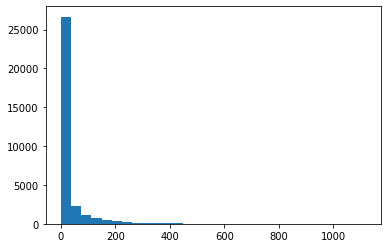

In [76]:
plt.hist(errors.values, bins=30);

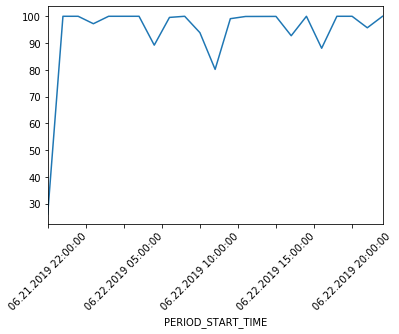

In [83]:
X_new.iloc[np.where(errors>200)[0],:].iloc[0,:].plot(rot=45)

## Normalization

In [84]:
X_new.head()

PERIOD_START_TIME,06.21.2019 22:00:00,06.22.2019 01:00:00,06.22.2019 02:00:00,06.22.2019 03:00:00,06.22.2019 04:00:00,06.22.2019 05:00:00,06.22.2019 06:00:00,06.22.2019 07:00:00,06.22.2019 08:00:00,06.22.2019 09:00:00,...,06.22.2019 13:00:00,06.22.2019 14:00:00,06.22.2019 15:00:00,06.22.2019 16:00:00,06.22.2019 17:00:00,06.22.2019 18:00:00,06.22.2019 19:00:00,06.22.2019 20:00:00,06.22.2019 21:00:00,06.22.2019 22:00:00
LNCEL name,,,,,,,,,,,,,,,,,,,,,
11830,100.00,100.00,100.00,100.000,100.000,100.00,100.00,100.000,100.000,98.885,...,99.455,88.895,99.980,100.000,100.000,99.975,100.000,95.795,95.875,100.00
11831,91.27,100.00,100.00,99.750,94.775,78.59,100.00,99.950,99.965,99.680,...,95.120,99.615,98.540,90.100,99.720,99.780,99.655,99.825,100.000,93.10
32201,26.11,100.00,100.00,97.220,100.000,100.00,100.00,89.210,99.580,100.000,...,99.930,99.940,99.950,92.735,100.000,88.055,100.000,100.000,95.705,100.00
32202,30.06,78.85,100.00,83.935,100.000,100.00,89.89,55.205,69.630,91.180,...,72.780,70.585,51.610,46.810,73.445,74.440,70.410,86.630,76.735,79.06
32203,46.84,39.12,52.07,70.435,59.935,65.25,73.35,70.080,63.735,68.675,...,66.790,70.975,62.145,64.265,75.135,67.640,77.625,73.515,78.780,72.28


In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [89]:
scl = MinMaxScaler()
scl.fit(X_new)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [92]:
scl.transform(X_new)[0]

array([0.99196508, 0.88888889, 0.99661152, 0.99606554, 0.95803794,
       0.84001848, 0.98804466, 0.96749226, 0.99750127, 0.98608895,
       0.93827514, 0.93410157, 0.99436676, 0.98364649, 0.85257395,
       0.9786697 , 0.99304866, 0.99284464, 0.98629487, 0.98517534,
       0.95253197, 0.94055035, 0.97370983])

In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
pipe = make_pipeline(MinMaxScaler(), KMeans())

In [95]:
pipe.fit(X_new)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [96]:
X_new.shape

(32485, 23)

In [97]:
X_r.shape

(32485, 23)

In [104]:
np.matmul(X.values,X.values.T)

array([[109.0785,  80.1136,  79.9084, ...,   0.    ,   0.    ,   0.    ],
       [ 80.1136,  59.6266,  59.494 , ...,   0.    ,   0.    ,   0.    ],
       [ 79.9084,  59.494 ,  59.4   , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ]])

In [101]:
X**2 # Element-wise squares

,"E-RAB Stp Att, QCI4",Add E-RAB Stp Att,"E-RAB Stp Att, QCI1",Avg act UEs DL DRBs QCI1,Avg act UEs UL DRBs QCI1,Max Act UEs per cell DL,Max Act UEs per cell UL,Max nr active UEs per cell,Max nr RRC conn UEs per cell,Avg Nr UEs UL intra-eNB CoMP,Avg CA capab UEs DL,Avg CA cap UEs for 3CCs DL,Avg UEs active SCell DL,Avg UEs activ 2 SCell DL,Avg Latency Uplink,Amount of active cells
0,0,0,0,0.0000,0.0,4,4,49,49,0.0,1.2321,0.8464,0.0,0.0,0.0,1
1,0,0,0,0.0121,0.0,4,4,25,25,0.0,0.4624,0.1521,0.0,0.0,0.0,1
2,0,0,0,0.0000,0.0,4,4,25,25,0.0,0.2704,0.1296,0.0,0.0,0.0,1
3,0,0,0,0.0000,0.0,4,4,25,25,0.0,0.2916,0.2116,0.0,0.0,0.0,1
4,0,0,0,0.0000,0.0,4,4,16,16,0.0,0.1936,0.1225,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,0,0,0,0.0000,0.0,0,0,0,0,0.0,0.0000,0.0000,0.0,0.0,0.0,0
1422,0,0,0,0.0000,0.0,0,0,0,0,0.0,0.0000,0.0000,0.0,0.0,0.0,0
1423,0,0,0,0.0000,0.0,0,0,0,0,0.0,0.0000,0.0000,0.0,0.0,0.0,0
1424,0,0,0,0.0000,0.0,0,0,0,0,0.0,0.0000,0.0000,0.0,0.0,0.0,0
